# 효자동 인구 분포와 비슷한 동네 찾기

<br/>
<br/>
<br/>
<br/>

## 모듈 import

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
display(HTML('<style>.container {width : 100%; !important;}</style>'))

<br/>
<br/>
<br/>
<br/>

## 데이터 로드

In [2]:
# 202201_202201_연령별인구현황_월간.csv 파일을 읽으세요. (encoding = 'cp949', thousands = ',')
df = pd.read_csv('202201_202201_연령별인구현황_월간.csv',encoding = 'cp949', thousands = ',')
df

,행정구역,2022년01월_계_총인구수,2022년01월_계_연령구간인구수,2022년01월_계_0세,2022년01월_계_1세,2022년01월_계_2세,2022년01월_계_3세,2022년01월_계_4세,2022년01월_계_5세,2022년01월_계_6세,...,2022년01월_계_91세,2022년01월_계_92세,2022년01월_계_93세,2022년01월_계_94세,2022년01월_계_95세,2022년01월_계_96세,2022년01월_계_97세,2022년01월_계_98세,2022년01월_계_99세,2022년01월_계_100세 이상
0,서울특별시 (1100000000),9505926,9505926,42645,44681,48381,51247,55310,62274,67281,...,8058,6842,5404,4061,2714,1866,1368,1237,857,1683
1,서울특별시 종로구 (1111000000),144543,144543,469,477,576,544,638,746,855,...,173,147,110,92,77,49,29,24,26,35
2,서울특별시 종로구 청운효자동(1111051500),11941,11941,42,52,53,57,67,72,101,...,9,10,10,5,5,5,2,3,2,2
3,서울특별시 종로구 사직동(1111053000),9349,9349,42,25,44,35,52,67,81,...,11,18,9,8,6,8,4,2,2,1
4,서울특별시 종로구 삼청동(1111054000),2457,2457,5,6,5,5,16,6,19,...,4,5,4,2,2,0,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,제주특별자치도 서귀포시 서홍동(5013058000),11149,11149,73,71,96,94,121,143,164,...,9,6,10,0,1,2,1,1,2,4
3866,제주특별자치도 서귀포시 대륜동(5013059000),15386,15386,112,127,167,142,159,176,168,...,17,10,8,9,4,3,1,5,3,5
3867,제주특별자치도 서귀포시 대천동(5013060000),13809,13809,80,99,132,120,185,211,193,...,15,9,9,6,6,2,1,1,3,3
3868,제주특별자치도 서귀포시 중문동(5013061000),11959,11959,64,72,86,79,74,91,112,...,14,14,9,5,2,4,1,2,0,4


<br/>
<br/>
<br/>
<br/>

## 데이터 정보 조회

In [3]:
# 행과 열의 개수를 구하세요.
df.values.shape

(3870, 104)

In [4]:
# 컬럼명을 조회하세요.
df.columns

Index(['행정구역', '2022년01월_계_총인구수', '2022년01월_계_연령구간인구수', '2022년01월_계_0세',
       '2022년01월_계_1세', '2022년01월_계_2세', '2022년01월_계_3세', '2022년01월_계_4세',
       '2022년01월_계_5세', '2022년01월_계_6세',
       ...
       '2022년01월_계_91세', '2022년01월_계_92세', '2022년01월_계_93세', '2022년01월_계_94세',
       '2022년01월_계_95세', '2022년01월_계_96세', '2022년01월_계_97세', '2022년01월_계_98세',
       '2022년01월_계_99세', '2022년01월_계_100세 이상'],
      dtype='object', length=104)

In [5]:
# 세번째 컬럼 명 부터 슬라이싱하여 cols에 저장하세요. (인구 분포를 확인할 컬럼)
cols = df.columns[3:]
cols

Index(['2022년01월_계_0세', '2022년01월_계_1세', '2022년01월_계_2세', '2022년01월_계_3세',
       '2022년01월_계_4세', '2022년01월_계_5세', '2022년01월_계_6세', '2022년01월_계_7세',
       '2022년01월_계_8세', '2022년01월_계_9세',
       ...
       '2022년01월_계_91세', '2022년01월_계_92세', '2022년01월_계_93세', '2022년01월_계_94세',
       '2022년01월_계_95세', '2022년01월_계_96세', '2022년01월_계_97세', '2022년01월_계_98세',
       '2022년01월_계_99세', '2022년01월_계_100세 이상'],
      dtype='object', length=101)

<br/>
<br/>
<br/>
<br/>

## 데이터 타입 변경

In [6]:
# 각 열 별 데이터 타입을 조회하세요.
df.dtypes

행정구역                  object
2022년01월_계_총인구수        int64
2022년01월_계_연령구간인구수     int64
2022년01월_계_0세          int64
2022년01월_계_1세          int64
                       ...  
2022년01월_계_96세         int64
2022년01월_계_97세         int64
2022년01월_계_98세         int64
2022년01월_계_99세         int64
2022년01월_계_100세 이상     int64
Length: 104, dtype: object

<br/>
<br/>
<br/>
<br/>

## 효자동과 사직동 인구 분포의 차이
- 두 지역의 각 열 별 차이를 구한 뒤
- 각 차이의 제곱의 합을 더한 값을 error라 정의한다.
- 두 지역의 error가 작을수록 인구 분포가 비슷하다고 정의한다.

In [7]:
# 2번 행(효자동 행), cols 컬럼을 선택하여 flag에 저장하세요.
flag = df.loc[2,cols]
flag

2022년01월_계_0세         42
2022년01월_계_1세         52
2022년01월_계_2세         53
2022년01월_계_3세         57
2022년01월_계_4세         67
                      ..
2022년01월_계_96세         5
2022년01월_계_97세         2
2022년01월_계_98세         3
2022년01월_계_99세         2
2022년01월_계_100세 이상     2
Name: 2, Length: 101, dtype: object

In [8]:
# 3번 행(사직동 행), cols 컬럼을 선택하여 temp에 저장하세요.
temp = df.loc[3,cols]
temp

2022년01월_계_0세         42
2022년01월_계_1세         25
2022년01월_계_2세         44
2022년01월_계_3세         35
2022년01월_계_4세         52
                      ..
2022년01월_계_96세         8
2022년01월_계_97세         4
2022년01월_계_98세         2
2022년01월_계_99세         2
2022년01월_계_100세 이상     1
Name: 3, Length: 101, dtype: object

In [9]:
# 두 지역의 각 열 별 차이를 구하세요.
flag - temp

2022년01월_계_0세          0
2022년01월_계_1세         27
2022년01월_계_2세          9
2022년01월_계_3세         22
2022년01월_계_4세         15
                      ..
2022년01월_계_96세        -3
2022년01월_계_97세        -2
2022년01월_계_98세         1
2022년01월_계_99세         0
2022년01월_계_100세 이상     1
Length: 101, dtype: object

In [10]:
# 위 결과의 값에 제곱을 하세요.
pow(flag - temp,2)

2022년01월_계_0세           0
2022년01월_계_1세         729
2022년01월_계_2세          81
2022년01월_계_3세         484
2022년01월_계_4세         225
                     ... 
2022년01월_계_96세          9
2022년01월_계_97세          4
2022년01월_계_98세          1
2022년01월_계_99세          0
2022년01월_계_100세 이상      1
Length: 101, dtype: object

In [11]:
# 위 결과의 값을 모두 더하세요. (효자동과 사직동의 error)
sum(pow(flag - temp,2))
# sum(pow(flag - temp,2)).sum() np용으로 사용가능

125072

<br/>
<br/>
<br/>
<br/>

## 효자동과 다른 동네의 인구 분포 차이
- 위와 같은 방법으로 효자동을 기준으로 다른 동네와의 error를 구하여 result 리스트에 추가하세요.

In [12]:
result = []
flag = df.loc[2,cols]

for i in range(len(df)) :
    temp = df.loc[i,cols]
    result.append(pow(flag - temp,2).sum())
result

[1182379033357,
 232502184,
 0,
 125072,
 1171780,
 92904,
 577295,
 215391,
 78206,
 795496,
 406460,
 675289,
 408263,
 930736,
 700364,
 312774,
 403578,
 499299,
 329715,
 164995430,
 1181687,
 725084,
 1064304,
 848802,
 763638,
 642722,
 1345442,
 319147,
 224424,
 428965,
 158424,
 119060,
 94938,
 361118,
 101447,
 593218052,
 458949,
 198944,
 353395,
 1447391,
 689340,
 98832,
 116951,
 89377,
 2251715,
 2543056,
 251406,
 472230,
 200801,
 1241426,
 83673,
 215589,
 999059097,
 432076,
 3237044,
 1837328,
 1343389,
 152017,
 1754724,
 198908,
 250495,
 1791342,
 237975,
 3065126,
 543956,
 147774,
 529197,
 183839,
 142572,
 212801,
 1500359657,
 9751553,
 1769614,
 583113,
 1789916,
 536042,
 4327557,
 355545,
 8393372,
 2022558,
 2448663,
 3461538,
 896300,
 2468083,
 2944295,
 4026840,
 1393796460,
 7055174,
 2615462,
 4117240,
 625208,
 4278311,
 3680071,
 9715771,
 5725211,
 1084557,
 578518,
 587396,
 2741512,
 1376414,
 886160,
 1896430581,
 2400180,
 843158,
 304315,

In [13]:
# result 리스트를 pd.Series로 변환하세요.
result = pd.Series(result)
result

0       1182379033357
1           232502184
2                   0
3              125072
4             1171780
            ...      
3865           105116
3866           250581
3867           171922
3868            33522
3869           869752
Length: 3870, dtype: int64

In [14]:
# 값을 기준으로 정렬하세요.
result.sort_values()

2                   0
3868            33522
695             48644
387             52405
3197            57932
            ...      
827      113415101061
3487     139019226541
452      142905747981
0       1182379033357
1276    2406921199175
Length: 3870, dtype: int64

In [15]:
# 3868 행을 조회하세요.
df.loc[3868]

행정구역                  제주특별자치도 서귀포시 중문동(5013061000)
2022년01월_계_총인구수                              11959
2022년01월_계_연령구간인구수                           11959
2022년01월_계_0세                                   64
2022년01월_계_1세                                   72
                                  ...             
2022년01월_계_96세                                   4
2022년01월_계_97세                                   1
2022년01월_계_98세                                   2
2022년01월_계_99세                                   0
2022년01월_계_100세 이상                               4
Name: 3868, Length: 104, dtype: object

<br/>
<br/>
<br/>
<br/>

## (참고) 시각화

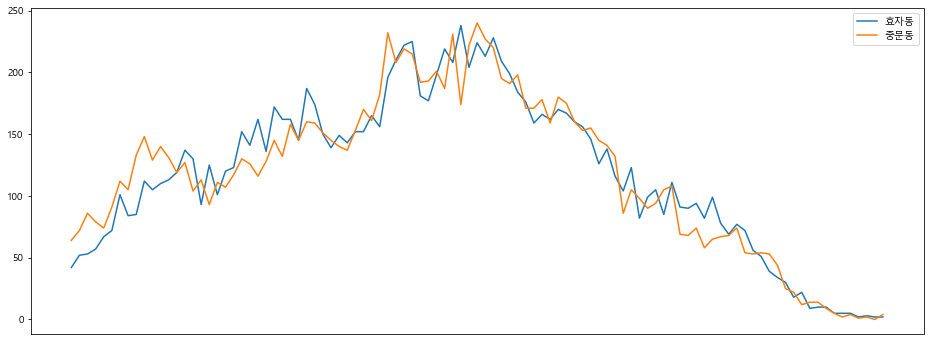

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (16,6))

plt.plot(flag, label = '효자동')
plt.plot(df.loc[3868, cols], label = '중문동')
plt.legend()
plt.xticks([])
plt.show()